# 실습10) 홉필드 모형을 이용한 패턴인식

1. 홉필드 모형을 이용한 패턴인식 알고리즘을 구현하세요. \\
1) 인식하고자 하는 패턴 3개를 선언하세요. (20점) \\
2) 랜덤하게 패턴 중 하나를 고르고, 확률적으로 (~20%) 패턴의 요소를 뒤집어 input pattern을 만드세요. (30점) \\
3) 홉필드 모형을 이용해 원래의 패턴을 유추하세요. (50점)


Input


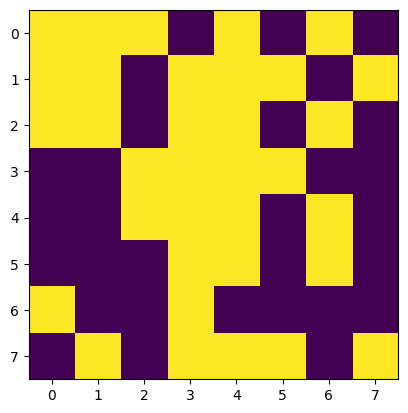

Output


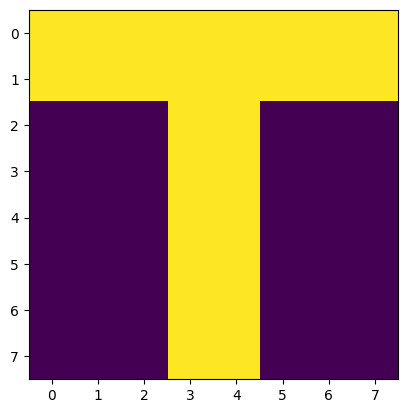

In [43]:
import numpy as np
import matplotlib.pyplot as plt
p = 3
L = 8; N = L*L
MaxStep = 3; Noise = 0.2
xi = np.zeros([p, N])

xi[0] = [1,1,1,1,1,1,1,1, \
         1,1,1,1,1,1,1,1, \
         0,0,0,1,1,0,0,0, \
         0,0,0,1,1,0,0,0, \
         0,0,0,1,1,0,0,0, \
         0,0,0,1,1,0,0,0, \
         0,0,0,1,1,0,0,0, \
         0,0,0,1,1,0,0,0 ]

xi[1] = [1,1,1,1,1,1,1,1, \
         1,1,1,1,1,1,1,1, \
         0,0,0,0,0,0,1,1, \
         1,1,1,1,1,1,1,1, \
         1,1,1,1,1,1,1,1, \
         1,1,0,0,0,0,0,0, \
         1,1,1,1,1,1,1,1, \
         1,1,1,1,1,1,1,1 ]

xi[2] = [1,1,1,1,1,1,1,1, \
         1,1,1,1,1,1,1,1, \
         0,0,0,0,0,0,1,1, \
         1,1,1,1,1,1,1,1, \
         1,1,1,1,1,1,1,1, \
         0,0,0,0,0,0,1,1, \
         0,0,0,0,0,0,1,1, \
         0,0,0,0,0,0,1,1 ]

xi[xi == 0] = -1
J = (xi.T@xi)/p
beta = np.random.randint(p)
S = xi[beta]
for i in range(N):
  if np.random.rand()<Noise:
    S[i] *= -1
print('Input')
plt.imshow(S.reshape(L,L))
plt.show()

F = J@S
for counter in range(MaxStep):
  for k in range(N):
    dE = 2*(F[k]*S[k] - J[k][k])
    if dE < 0:
      for i in range(N):
        F[i] -= 2*J[i][k]*S[k]
      S[k] *= -1

print('Output')
plt.imshow(S.reshape(L,L))
plt.show()

위의 코드는 홉필드 모형을 이용해 본인이 지정한 패턴에 대한 패턴인식 알고리즘을 구현한 코드이다. \\
변수 p는 저장된 패턴의 수로 본 코드에서는 3개의 패턴을 사용하기에 3으로 설정하였다. 변수 L은 차원(격자의 크기)를 나타내며 8로 설정하였으며, 변수 N은 뉴런의 총 개수를 나타낸다. MaxStep은 업데이트 단계의 반복횟수를 나타내며 3으로 설정하였다. 변수 Noise는 입력패턴에 노이즈를 첨가할 확률로, 문제에서 주어진대로 0.2로 설정하였다. \\
변수 xi는 인식하고자 하는 패턴을 저장하는 배열로, (p,N)의 크기를 갖는다. xi[0]은 한글의 모음 'ㅜ'를 나타내며, xi[1]은 한글의 자음 'ㄹ'을, xi[2]는 한글의 자음 'ㅋ'을 나타낸다. 이후 xi배열 내의 원소 0을 -1로 치환하여 스핀과 같이 1과 -1의 값으로 이루어지도록 패턴을 변환한다. 변수 J는 상호작용을 나타내는 값으로 $$J_{ij} = \dfrac{1}{p}\sum^p_{\alpha = 1}\xi_i^{(\alpha)}\xi_j^{(\alpha)}$$의 값을 저장한다. 변수 beta는 xi의 3가지 패턴 중 하나를 랜덤으로 선택하며, 변수 S는 선택한 패턴을 복사하여 저장한다. 이후 선택된 입력패턴 S의 모든 원소에 대하여 20%의 확률로 노이즈를 추가 (1과 -1의 값을 전환)하였다. 이후 "Input"이라는 문자와 함께 노이즈가 추가된 입력값을 출력한다. \\
변수 F는 모든 성분의 국소자기장을 계산하여 저장하며, $$F_k = \sum_iJ_{ki}S_i$$의 식을 의미한다. 이후 for문을 통해 에너지 차이를 계산하여 S값을 업데이트 한다. for문을 통해  S내의 모든 원소에 대해 $$\Delta E = 2(F_kS_k-J_{kk})$$의 공식을 통해 에너지 차이를 계산하여 만약 에너지 차이가 0보다 작으면 S의 모든원소에 대해 $$\Delta F_i = -J_{ik}S_k$$의 공식을 통해 $F_i$의 값을 새로 변경한 뒤 스핀을 변경한다. 최종적으로 스핀 변환이 끝난 뒤 'Output'이라는 글자와 함께 최종 출력값을 출력한다. \\
위 코드의 결과를 통해 출력값이 원래의 패턴과 동일함을 확인할 수 있었다.

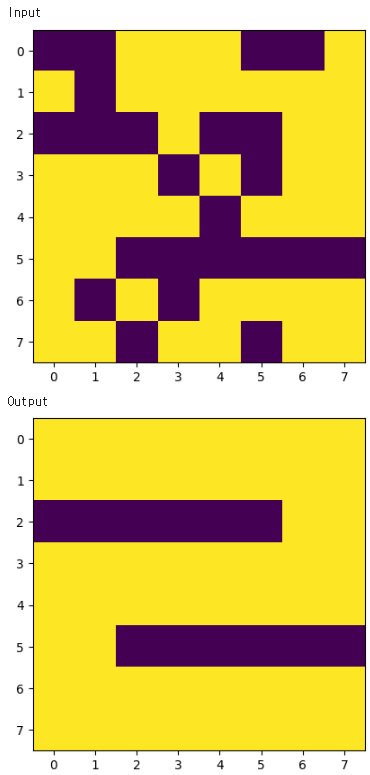
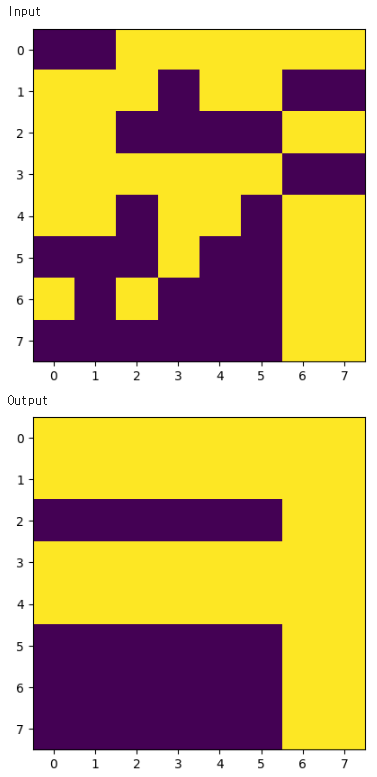
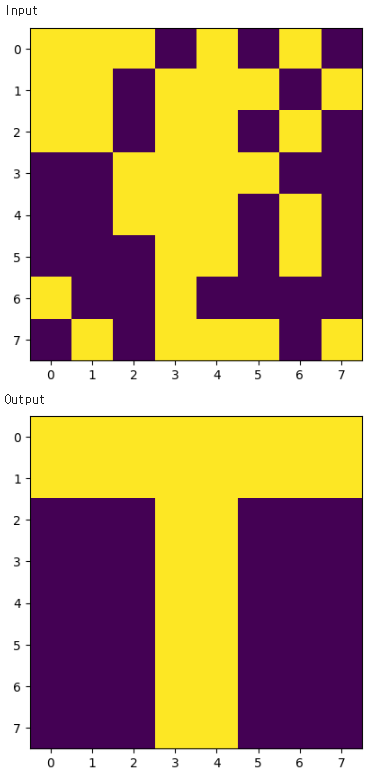